In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Load dataset
df = pd.read_csv("C:/Users/CONNCET/Desktop/ML/California_Houses.csv")  # Update filename if needed

# Display basic info
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [35]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [37]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())
# Fill missing values (if any) using median strategy
df.fillna(df.median(), inplace=True)

Missing Values:
 Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


In [39]:
# Split features & target variable
X = df.drop(columns=["Median_House_Value"])
y = df["Median_House_Value"]

# Split dataset (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [41]:
# Function to train & evaluate models
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    print(f"\n{model_name} Results:")
    print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.4f}")

    return model, mse, r2

In [43]:
# Train models
lr_model, lr_mse, lr_r2 = train_and_evaluate(LinearRegression(), "Linear Regression")
rf_model, rf_mse, rf_r2 = train_and_evaluate(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest")
gb_model, gb_mse, gb_r2 = train_and_evaluate(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42), "Gradient Boosting")



Linear Regression Results:
MSE: 4907211997.37, RMSE: 70051.50, R² Score: 0.6233

Random Forest Results:
MSE: 2392514828.87, RMSE: 48913.34, R² Score: 0.8164

Gradient Boosting Results:
MSE: 3002438148.23, RMSE: 54794.51, R² Score: 0.7695


In [44]:
# Compare models
models = ["Linear Regression", "Random Forest", "Gradient Boosting"]
mse_values = [lr_mse, rf_mse, gb_mse]
r2_values = [lr_r2, rf_r2, gb_r2]

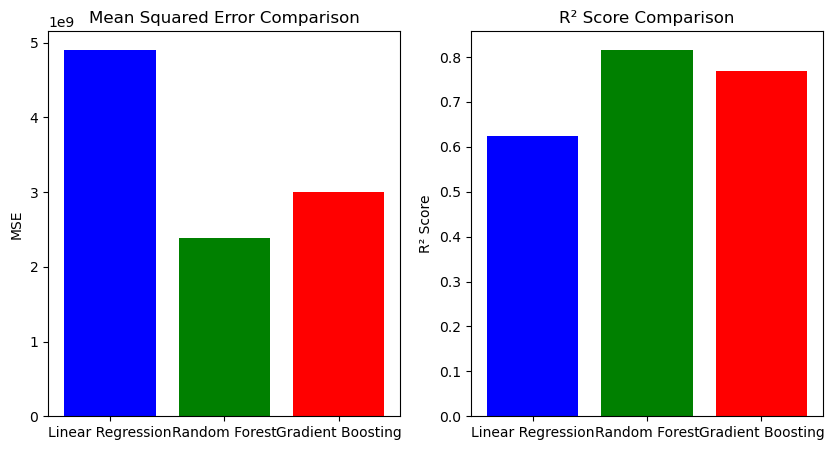

In [47]:
# Plot comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=["blue", "green", "red"])
plt.ylabel("MSE")
plt.title("Mean Squared Error Comparison")

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=["blue", "green", "red"])
plt.ylabel("R² Score")
plt.title("R² Score Comparison")

plt.show()


In [48]:
# Final evaluation on test set with best model (assuming Gradient Boosting performs best)
final_model = gb_model
y_test_pred = final_model.predict(X_test)

# Test set performance
print("\nFinal Model Performance on Test Set:")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
print(f"Test R² Score: {r2_score(y_test, y_test_pred):.4f}")


Final Model Performance on Test Set:
Test MSE: 2620623241.45
Test RMSE: 51192.02
Test R² Score: 0.8018
